In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.corpus import stopwords
stopwords.words("english")[0:500:25] #stopwords are generally neutral in sentiment

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

In [8]:
rawData = open("SMSSpamCollection.tsv").read()
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [9]:
parsedData = rawData.replace("\t", "\n").split("\n")

In [10]:
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [16]:
labelList = parsedData[0:-1:2] #grabs only the labels (spam or ham), the last entry is empty
textList = parsedData[1::2] #grabs only the text part (actual sms)

In [17]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [18]:
import pandas as pd
fullCorpus = pd.DataFrame({
    "label": labelList,
    "body_list": textList
})
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [19]:
dataset = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [20]:
fullCorpus.columns = ["label", "body_text"]

In [21]:
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [32]:
#shape of the dataset
fullCorpus.shape #(5570,2)

#length of dataset
len(fullCorpus) #5570

#how many spams and hams
len(fullCorpus[fullCorpus["label"] == "spam"]) #746 are spam
len(fullCorpus[fullCorpus["label"] == "ham"]) #4824 are ham

#any missing value?
fullCorpus["label"].isnull().sum()
fullCorpus["body_text"].isnull().sum() # no missing value 

0

In [38]:
#remove punctuation 

import string
string.punctuation #!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
def remove_punctuation(text):
    text_nopunctu = "".join([char for char in text if char not in string.punctuation])
    return text_nopunctu

fullCorpus["body_text_nopunct"] = fullCorpus["body_text"].apply(lambda x: remove_punctuation(x))
fullCorpus.head()

,label,body_text,body_text_nopunct
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [40]:
#tokenizing

import re
def tokenize(text):
    tokens = re.split("\W+", text)  #one or more non-word characters
    return tokens 

fullCorpus["body_text_tokenized"] = fullCorpus["body_text_nopunct"].apply(lambda x: tokenize(x.lower()))
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [42]:
#remove stopwords 

stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(tokenized):
    text = [word for word in tokenized if word not in stopwords]
    return text
fullCorpus["body_text_nostop"] = fullCorpus['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [47]:
#stemming in order to reduce the amount of tokens to handle in the corpus

ps = nltk.PorterStemmer()
def stemming(text):
    stemmedText = [ps.stem(word) for word in text]
    return stemmedText 

fullCorpus["body_text_stemmed"] = fullCorpus["body_text_nostop"].apply(lambda x: stemming(x))
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [174]:
#apply count vectorizer 

from sklearn.feature_extraction.text import CountVectorizer 

def dummy(doc):
    return doc #since I already have the text cleaned to a list

count_vect = CountVectorizer(
        tokenizer=dummy,
        preprocessor=dummy)

X_counts = count_vect.fit_transform(fullCorpus["body_text_stemmed"])
X_counts.shape   #(20, 201) there are 20 text messages and 201 are the # of unique words
count_vect.get_feature_names()

X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_counts_df.columns = count_vect.get_feature_names()

In [86]:
#N-grams 
#the list of stemmized tockens back to strings for N-gram treatment 

fullCorpus["ngram"] = fullCorpus["body_text_stemmed"].apply(lambda x: " ".join(x))
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed,ngram
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...",ive search right word thank breather promis wo...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday


In [175]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts_ngram = ngram_vect.fit_transform(fullCorpus["ngram"])
X_counts_ngram.shape #(20, 209) 209 combinations of unique 2 words 
ngram_vect.get_feature_names()

#into dataframe 
X_counts_ngram_df = pd.DataFrame(X_counts_ngram.toarray())
X_counts_ngram_df.columns = ngram_vect.get_feature_names()
X_counts_ngram_df.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
#tf-idf (term frequency - inverse document frequency): helps you identify a word that's seldomly used but important 

from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vect = TfidfVectorizer(
        tokenizer=dummy,
        preprocessor=dummy)
X_tfidf = tfidf_vect.fit_transform(fullCorpus["body_text_stemmed"])
X_tfidf.shape   #(20, 201) shape is the same as the count vectorizer 
tfidf_vect.get_feature_names()[40:50]

['07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx']

In [108]:
#showing dataframe with the feature names 

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df.head()

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.238737,0.238737,0.209853,0.0,0.0,0.0,0.0,0.0
1,0.0,0.198986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.198986,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [109]:
#feature creation - hypothesis 1: Spam messages tend to be longer than non-spam text messages 

fullCorpus["body_len"] = fullCorpus["body_text"].apply(lambda x: len(x) - x.count(" ")) 
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed,ngram,body_len
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...",ive search right word thank breather promis wo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday,28


In [110]:
#feature creation - hypothesis 2: Spam messages use more punctuations than non-spam messages

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

fullCorpus["punct%"] = fullCorpus["body_text"].apply(lambda x: count_punct(x))
fullCorpus.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_text_nostop,body_text_stemmed,ngram,body_len,punct%
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...",ive search right word thank breather promis wo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday,28,7.1


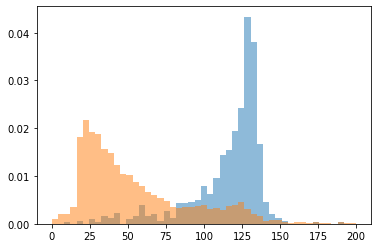

In [118]:
#looking at the distribution of the body_len feature

from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 200, 50)

pyplot.hist(fullCorpus[fullCorpus["label"] == "spam"]["body_len"], bins, alpha=0.5, label="spam", density=True)
pyplot.hist(fullCorpus[fullCorpus["label"] == "ham"]["body_len"], bins, alpha=0.5, label="ham", density=True)
pyplot.show()

#The histogram distribution shows that spam tends to be longer, proving the hypothesis is correct. 

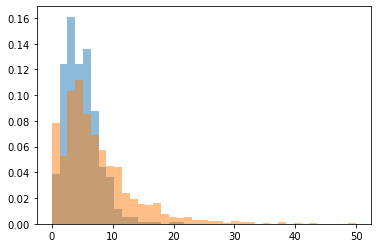

In [120]:
#looking at the distribution of the punctuation percent feature

from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 50, 40)

pyplot.hist(fullCorpus[fullCorpus["label"] == "spam"]["punct%"], bins, alpha=0.5, label="spam", density=True)
pyplot.hist(fullCorpus[fullCorpus["label"] == "ham"]["punct%"], bins, alpha=0.5, label="ham", density=True)
pyplot.show()

#The histogram distribution shows that how often punctuations were used is not really hepling decide whether the message is spam or ham

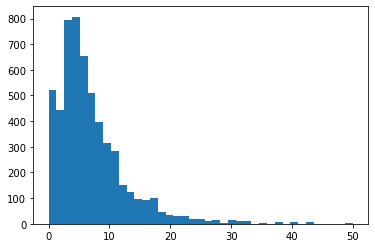

In [124]:
#decide if the feature is a fit for transformation, a process that alters each data point in a certain column in a systematic way, such as squaring or rooting  

bins = np.linspace(0, 50, 40)
pyplot.hist(fullCorpus["punct%"], bins)
pyplot.show()

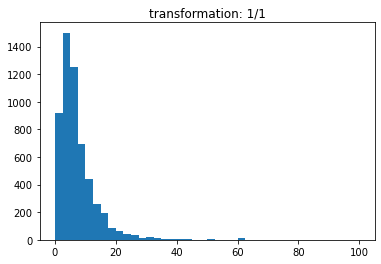

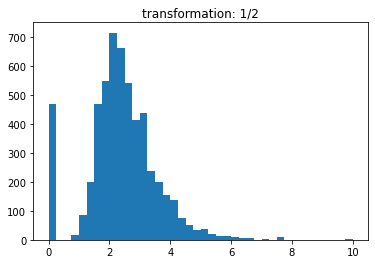

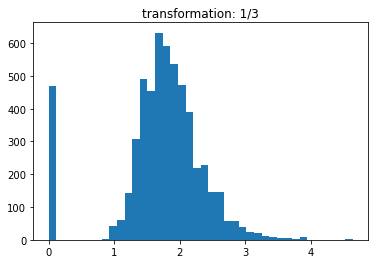

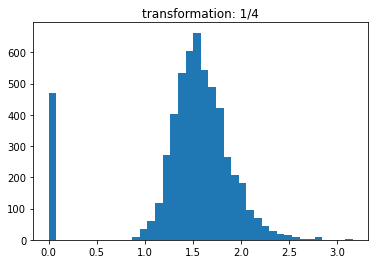

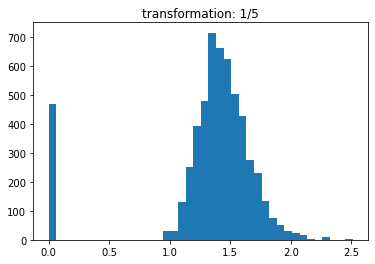

In [127]:
# Steps for transformation - determin the range of exponents, apply the transformation method, decide which transformation produced the best normal distribution 

for i in range(1,6):
    pyplot.hist((fullCorpus["punct%"])**(1/i), bins = 40)
    pyplot.title("transformation: 1/{}".format(str(i)))
    pyplot.show()

# As the loop continues, the distribution gets more normal. The left bar at 0 means the text message had no punct at all.

In [179]:
# Cross-validation with random forest classifier, 5 splits of datasets 

X_features = pd.concat([fullCorpus["body_len"], fullCorpus["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,131,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,29,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335221,0.0,0.0
5567,48,14.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5568,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score 

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, fullCorpus["label"], cv=k_fold, scoring="accuracy", n_jobs=-1, error_score="raise")

array([0.97486535, 0.97755835, 0.97307002, 0.96678636, 0.97396768])

In [186]:
# explore throughout the holdout set

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, fullCorpus["label"], test_size=0.2)


In [188]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf1_model = rf1.fit(X_train, y_train)
sorted(zip(rf1_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.056871801729855516, 1804),
 (0.043567124730261086, 'body_len'),
 (0.03626770555835978, 2032),
 (0.03289926831549933, 3135),
 (0.028664348721795622, 4799),
 (0.02522197547734819, 7353),
 (0.02504915981363763, 6749),
 (0.017000598899455672, 5727),
 (0.016702633371724954, 7030),
 (0.015488243063048072, 7221)]

In [198]:
y_pred = rf1_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")
print("precision: {}".format(precision))  
print("recall: {}".format(recall))          
print("fscore: {}".format(fscore))
print("support: {}".format(support))
print("accuracy: {}".format((y_pred==y_test).sum()/len(y_pred)))  

precision: 1.0
recall: 0.5512820512820513
fscore: 0.7107438016528926
support: None
accuracy: 0.9371633752244165


Results: 
- precision 1.0: messages that were flagged as spam were actually all spam
- recall 0.56: spam flagging was correct in about half cases
- accuracy 0.9: the spam/non-spam altogether the flagging was correct mostly, 
- there were lots of non-spam as opposed to spam, reason for high accuracy
- in general, flagging was not aggressive enough to do the right job for spam

In [209]:
#grid search to find out the most optimal hypermeter combinations 

def train_RF(n_est, depth):
    rf2 = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf2_model = rf2.fit(X_train, y_train)
    y_pred = rf2_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")
    print("est: {}, dep: {}, precision: {}, recall: {}, accuracy: {}".format(n_est, depth, precision, recall, (y_pred==y_test).sum()/len(y_pred)))

In [210]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

est: 10, dep: 10, precision: 1.0, recall: 0.21153846153846154, accuracy: 0.8895870736086176
est: 10, dep: 20, precision: 1.0, recall: 0.5448717948717948, accuracy: 0.9362657091561939
est: 10, dep: 30, precision: 1.0, recall: 0.6538461538461539, accuracy: 0.9515260323159784
est: 10, dep: None, precision: 0.9913793103448276, recall: 0.7371794871794872, accuracy: 0.9622980251346499
est: 50, dep: 10, precision: 1.0, recall: 0.1987179487179487, accuracy: 0.8877917414721723
est: 50, dep: 20, precision: 1.0, recall: 0.5576923076923077, accuracy: 0.9380610412926391
est: 50, dep: 30, precision: 1.0, recall: 0.6987179487179487, accuracy: 0.9578096947935368
est: 50, dep: None, precision: 1.0, recall: 0.782051282051282, accuracy: 0.9694793536804309
est: 100, dep: 10, precision: 1.0, recall: 0.21794871794871795, accuracy: 0.8904847396768402
est: 100, dep: 20, precision: 1.0, recall: 0.532051282051282, accuracy: 0.9344703770197487
est: 100, dep: 30, precision: 1.0, recall: 0.6923076923076923, accura

Results:
- # of estimators has no siginificant impact on precision
- # of depth should be higher to increase recall 
- # of estimators might help with accuracy, but not drastically 

In [215]:
# compare count vectorization and tf-idf vectorization 

X_tfidf_feat = pd.concat([fullCorpus["body_len"], fullCorpus["punct%"], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_count_feat = pd.concat([fullCorpus["body_len"], fullCorpus["punct%"], pd.DataFrame(X_counts.toarray())], axis=1)
X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
#exploring parameter settings using grid search cross validation

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {"n_estimators": [10, 150, 300],
        "max_depth": [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, fullCorpus["label"])
gs_fit.cv_results_

{'mean_fit_time': array([ 1.5088748 ,  8.37458916, 16.38310285,  1.80920196, 14.21102905,
        27.80947485,  2.03849411, 17.84544368, 35.59961524,  2.09567456,
        19.5961412 , 32.82887082]),
 'std_fit_time': array([0.00861753, 0.04511103, 0.0781523 , 0.05511574, 0.12324612,
        0.11838077, 0.07506778, 0.12865599, 0.12851671, 0.04922546,
        0.73327477, 0.3542608 ]),
 'mean_score_time': array([0.16045418, 0.19769363, 0.25738864, 0.18817067, 0.24900131,
        0.30814261, 0.16580625, 0.2483089 , 0.39110861, 0.16353507,
        0.25497379, 0.25215502]),
 'std_score_time': array([0.00285351, 0.00727952, 0.01167583, 0.0578688 , 0.02248207,
        0.00694978, 0.01255427, 0.00941587, 0.02338941, 0.00327678,
        0.02392652, 0.02996939]),
 'param_max_depth': masked_array(data=[30, 30, 30, 60, 60, 60, 90, 90, 90, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=

In [221]:
pd.DataFrame(gs_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.508875,0.008618,0.160454,0.002854,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.966786,0.949731,0.953321,0.949731,0.952424,0.954399,0.006358,12
1,8.374589,0.045111,0.197694,0.007280,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.969479,0.961400,0.962298,0.955117,0.954219,0.960503,0.005534,11
2,16.383103,0.078152,0.257389,0.011676,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.970377,0.960503,0.964991,0.956912,0.952424,0.961041,0.006235,10
3,1.809202,0.055116,0.188171,0.057869,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.969479,0.976661,0.968582,0.964093,0.968582,0.969479,0.004054,8
4,14.211029,0.123246,0.249001,0.022482,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.978456,0.977558,0.971275,0.967684,0.966786,0.972352,0.004864,5
5,27.809475,0.118381,0.308143,0.006950,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.974865,0.974865,0.971275,0.966786,0.970377,0.971634,0.003036,6
6,2.038494,0.075068,0.165806,0.012554,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973968,0.974865,0.973070,0.964093,0.969479,0.971095,0.003950,7
7,17.845444,0.128656,0.248309,0.009416,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.975763,0.977558,0.969479,0.972172,0.974506,0.003191,1
8,35.599615,0.128517,0.391109,0.023389,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.978456,0.973968,0.970377,0.969479,0.973788,0.003472,3
9,2.095675,0.049225,0.163535,0.003277,None,10,"{'max_depth': None, 'n_estimators': 10}",0.965889,0.958707,0.966786,0.966786,0.968582,0.965350,0.003435,9


In [224]:
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,17.845444,0.128656,0.248309,0.009416,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.975763,0.977558,0.969479,0.972172,0.974506,0.003191,1
11,32.828871,0.354261,0.252155,0.029969,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.977558,0.974865,0.969479,0.973070,0.974506,0.003036,1
8,35.599615,0.128517,0.391109,0.023389,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.978456,0.973968,0.970377,0.969479,0.973788,0.003472,3
10,19.596141,0.733275,0.254974,0.023927,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.977558,0.972172,0.967684,0.970377,0.972890,0.003740,4
4,14.211029,0.123246,0.249001,0.022482,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.978456,0.977558,0.971275,0.967684,0.966786,0.972352,0.004864,5
5,27.809475,0.118381,0.308143,0.006950,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.974865,0.974865,0.971275,0.966786,0.970377,0.971634,0.003036,6
6,2.038494,0.075068,0.165806,0.012554,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.973968,0.974865,0.973070,0.964093,0.969479,0.971095,0.003950,7
3,1.809202,0.055116,0.188171,0.057869,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.969479,0.976661,0.968582,0.964093,0.968582,0.969479,0.004054,8
9,2.095675,0.049225,0.163535,0.003277,None,10,"{'max_depth': None, 'n_estimators': 10}",0.965889,0.958707,0.966786,0.966786,0.968582,0.965350,0.003435,9
2,16.383103,0.078152,0.257389,0.011676,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.970377,0.960503,0.964991,0.956912,0.952424,0.961041,0.006235,10


In [225]:
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,17.845444,0.128656,0.248309,0.009416,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.975763,0.977558,0.969479,0.972172,0.974506,0.003191,1
11,32.828871,0.354261,0.252155,0.029969,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.977558,0.974865,0.969479,0.973070,0.974506,0.003036,1
8,35.599615,0.128517,0.391109,0.023389,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.978456,0.973968,0.970377,0.969479,0.973788,0.003472,3
10,19.596141,0.733275,0.254974,0.023927,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.977558,0.972172,0.967684,0.970377,0.972890,0.003740,4
4,14.211029,0.123246,0.249001,0.022482,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.978456,0.977558,0.971275,0.967684,0.966786,0.972352,0.004864,5


Results:
    - max depth tends to contribute to high test score
    - # of estimators don't seem to have big impact 
    - but # of estimators do have some impact on fit time 

In [228]:
rf = RandomForestClassifier()
param = {"n_estimators": [10, 150, 300],
        "max_depth": [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_counts, fullCorpus["label"])
gs_fit.cv_results_

{'mean_fit_time': array([ 0.23802514,  3.37331238,  7.30657763,  0.40148005,  6.6579174 ,
        13.23040586,  0.58455262,  8.3769712 , 14.46432738,  0.58846502,
         8.38832955, 13.70526462]),
 'std_fit_time': array([0.00537663, 0.02990227, 0.1654071 , 0.05117902, 0.10878632,
        0.20188078, 0.06325979, 0.80280581, 0.04169962, 0.01027882,
        0.32105277, 0.29687713]),
 'mean_score_time': array([0.00972681, 0.07746873, 0.12204704, 0.00934763, 0.07343936,
        0.14084959, 0.00967698, 0.08165197, 0.16464834, 0.01046033,
        0.08774104, 0.13552103]),
 'std_score_time': array([0.00200079, 0.03076858, 0.00922696, 0.00078664, 0.0011819 ,
        0.00103456, 0.00024739, 0.00216792, 0.00200233, 0.00033339,
        0.00591502, 0.00750596]),
 'param_max_depth': masked_array(data=[30, 30, 30, 60, 60, 60, 90, 90, 90, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=

In [229]:
pd.DataFrame(gs_fit.cv_results_).sort_values("mean_test_score", ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,14.464327,0.041700,0.164648,0.002002,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975763,0.971275,0.973070,0.967684,0.965889,0.970736,0.003573,1
10,8.388330,0.321053,0.087741,0.005915,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975763,0.972172,0.970377,0.966786,0.965889,0.970197,0.003609,2
7,8.376971,0.802806,0.081652,0.002168,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975763,0.971275,0.971275,0.966786,0.965889,0.970197,0.003564,3
11,13.705265,0.296877,0.135521,0.007506,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.971275,0.972172,0.964991,0.966786,0.970197,0.003867,3
6,0.584553,0.063260,0.009677,0.000247,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.971275,0.973070,0.967684,0.964093,0.963196,0.967864,0.003867,5


Results 
- in comparison to the ti-idf vectorizor, there is a slight difference in mean test score. ti-idf's mean test score is about 0.975 ish, and count vectorizer's mean test score is about 0.970. 
- again, the 90 or non max depth contributes to the top 3 datasets 


In [238]:
# gradient boosting 

from sklearn.ensemble import GradientBoostingClassifier 



In [241]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    gb_y_pred = gb_model.predict(X_test)
    gb_precision, gb_recall, gb_fscore, gb_support = score(y_test, gb_y_pred, pos_label="spam", average="binary")
    print("est: {}, depth:{}, learning rate: {}, precision: {}, recall: {}, accuracy: {}".format(est, max_depth, lr, gb_precision, gb_recall, (gb_y_pred == y_test).sum()/len(gb_y_pred)))


In [242]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)
            
# with 3-nested loops, it will take a long time to finish the calculations             

est: 50, depth:3, learning rate: 0.01, precision: 1.0, recall: 0.00641025641025641, accuracy: 0.8608617594254937
est: 50, depth:3, learning rate: 0.1, precision: 0.9385964912280702, recall: 0.6858974358974359, accuracy: 0.9497307001795332
est: 50, depth:3, learning rate: 1, precision: 0.9090909090909091, recall: 0.7692307692307693, accuracy: 0.9569120287253142
est: 50, depth:7, learning rate: 0.01, precision: 1.0, recall: 0.019230769230769232, accuracy: 0.8626570915619389
est: 50, depth:7, learning rate: 0.1, precision: 0.9523809523809523, recall: 0.7692307692307693, accuracy: 0.9622980251346499
est: 50, depth:7, learning rate: 1, precision: 0.851063829787234, recall: 0.7692307692307693, accuracy: 0.9488330341113106


/Users/sokim/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


est: 50, depth:11, learning rate: 0.01, precision: 0.0, recall: 0.0, accuracy: 0.8599640933572711
est: 50, depth:11, learning rate: 0.1, precision: 0.9389312977099237, recall: 0.7884615384615384, accuracy: 0.9631956912028725
est: 50, depth:11, learning rate: 1, precision: 0.8758620689655172, recall: 0.8141025641025641, accuracy: 0.9578096947935368
est: 50, depth:15, learning rate: 0.01, precision: 1.0, recall: 0.00641025641025641, accuracy: 0.8608617594254937
est: 50, depth:15, learning rate: 0.1, precision: 0.9253731343283582, recall: 0.7948717948717948, accuracy: 0.9622980251346499
est: 50, depth:15, learning rate: 1, precision: 0.8785714285714286, recall: 0.7884615384615384, accuracy: 0.9551166965888689
est: 100, depth:3, learning rate: 0.01, precision: 0.9512195121951219, recall: 0.5, accuracy: 0.926391382405745
est: 100, depth:3, learning rate: 0.1, precision: 0.936, recall: 0.75, accuracy: 0.9578096947935368
est: 100, depth:3, learning rate: 1, precision: 0.8705035971223022, reca

Results: 
    - those sets with high best precision, recall, accuracy were the ones with learning rate at 0.1, more depth and more estimators. 
    - poor performing ones were the ones with learning rate at 0.01, less estimators, and less depth

In [279]:
#model selection: 

X_train, X_test, y_train, y_test = train_test_split(fullCorpus[["body_text", "body_len", "punct%"]], fullCorpus["label"], test_size=0.2)
tfidf_vect_fit = tfidf_vect.fit(X_train["body_text"]) # store the training data set's body text column in this model, tfidf vectorizer. nothing has been done in terms of vectorization, just yet 

tfidf_train = tfidf_vect_fit.transform(X_train["body_text"]) # transform the training set via the tfidf vectorizer
tfidf_test = tfidf_vect_fit.transform(X_test["body_text"])   # transform the test set via the tfidf vectorizer

pd.DataFrame(tfidf_train.toarray())

/Users/sokim/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(preprocessor=<function dummy at 0x7f9969d90310>,
                tokenizer=<function dummy at 0x7f9969d90310>)


,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.629199,0.000000,0.0,0.000000,0.0,0.0,0.079980,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684697,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.076608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.447268,0.205616,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.465766,0.000000,0.0,0.072772,0.0,0.0,0.355233,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.608550,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.105466,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,0.595181,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4452,0.437088,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.212101,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.509283,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.557823,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
# index issue 

X_train[["body_len", "punct%"]].head() # because the full corpus has been split through from sklearn.model_selection import train_test_split randomly, the index is not in order.

,body_len,punct%
576,113,4.4
4278,120,5.0
2764,32,6.2
1463,147,10.9
3537,55,3.6


In [289]:
X_train_vect = pd.concat([X_train[["body_len", "punct%"]].reset_index(drop=True), pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[["body_len", "punct%"]].reset_index(drop=True), pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect #4456 rows × 118 columns
X_test_vect  #1114 rows × 118 columns

,body_len,punct%,0,1,2,3,4,5,6,7,...,106,107,108,109,110,111,112,113,114,115
0,55,9.1,0.684401,0.000000,0.0,0.0,0.0,0.0,0.138172,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,8.3,0.502574,0.000000,0.0,0.0,0.0,0.0,0.000000,0.174199,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17,0.0,0.596782,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,13.3,0.431910,0.238266,0.0,0.0,0.0,0.0,0.000000,0.209588,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,1.7,0.657551,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.276026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,44,15.9,0.471928,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1110,82,2.4,0.710462,0.000000,0.0,0.0,0.0,0.0,0.000000,0.068952,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1111,29,3.4,0.367142,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1112,50,4.0,0.598521,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
# taking how long each classifier (random forest and gradient boosting) takes 

import time 

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1) #those hyperpremeters that we learned work best 

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = end - start

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = end - start 

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label="spam", average="binary")

y_pred
print("fit time: {}, predict time: {}, precision: {}, recall: {}, accuracy: {}".format(fit_time, pred_time, precision, recall, (y_pred==y_test).sum()/len(y_pred)))

fit time: 0.45534682273864746, predict time: 0.026226043701171875, precision: 0.984375, recall: 0.8689655172413793, accuracy: 0.981149012567325


In [304]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=None) #those hyperpremeters that we learned work best, n_jobs no need because gb cannot be performed concurrently, hence longer time taking  

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = end - start

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = end - start 

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label="spam", average="binary")

y_pred
print("fit time: {}, predict time: {}, precision: {}, recall: {}, accuracy: {}".format(fit_time, pred_time, precision, recall, (y_pred==y_test).sum()/len(y_pred)))

fit time: 31.55548596382141, predict time: 0.016566991806030273, precision: 0.8888888888888888, recall: 0.8827586206896552, accuracy: 0.9703770197486535


Results:
    - we care more about predict time because fit time is going to happen only once (unless need for refit)
    - precision and recall are more in-depth look into how the model is peforming, than general accuracy 
    - so the important metrics are predict time, precision, and recall 
    - some trade off always exist 